In [1]:
import os
import numpy as np 
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
os.chdir(r"C:\Users\mehul\Time_Series_Analysis")
from predictions import *

In [2]:
df_lt_coin = predictions("litecoin_price.csv")
df_lt_coin.data = df_lt_coin.data.reindex(index=df_lt_coin.data.index[::-1])

            Open  High   Low  Close Volume   Market Cap    Mean
2013-04-28  4.30  4.40  4.18   4.35      -  7,37,73,400  4.3075
2013-04-29  4.37  4.57  4.23   4.38      -  7,49,52,700  4.3875
2013-04-30  4.40  4.57  4.17   4.30      -  7,57,26,800  4.3600
2013-05-01  4.29  4.36  3.52   3.80      -  7,39,01,200  3.9925
2013-05-02  3.78  4.04  3.01   3.37      -  6,52,42,700  3.5500
---------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1760 entries, 2013-04-28 to 2018-02-20
Freq: D
Data columns (total 7 columns):
Open          1760 non-null float64
High          1760 non-null float64
Low           1760 non-null float64
Close         1760 non-null float64
Volume        1760 non-null object
Market Cap    1760 non-null object
Mean          1760 non-null float64
dtypes: float64(5), object(2)
memory usage: 110.0+ KB
None
---------------------------------------------------------------
Open          0
High          0
Low           0

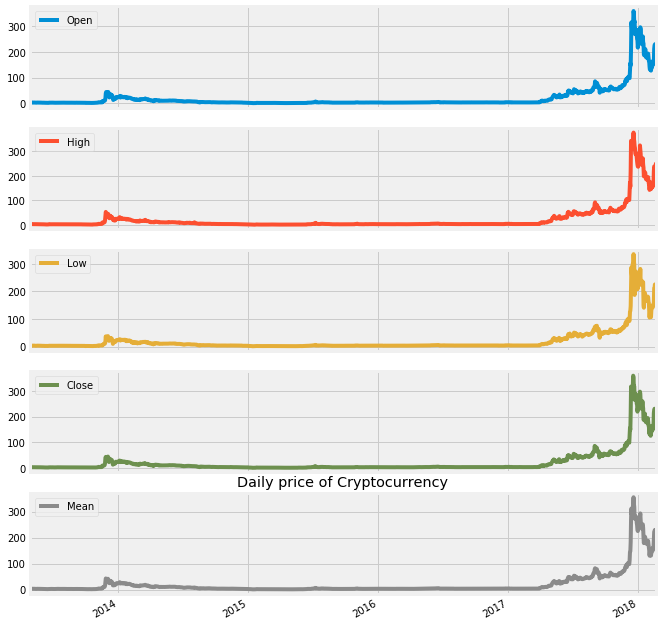

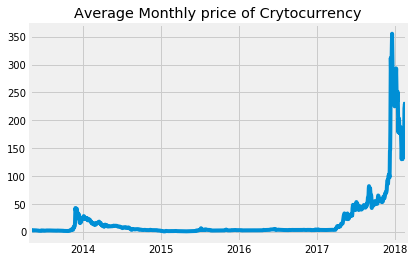

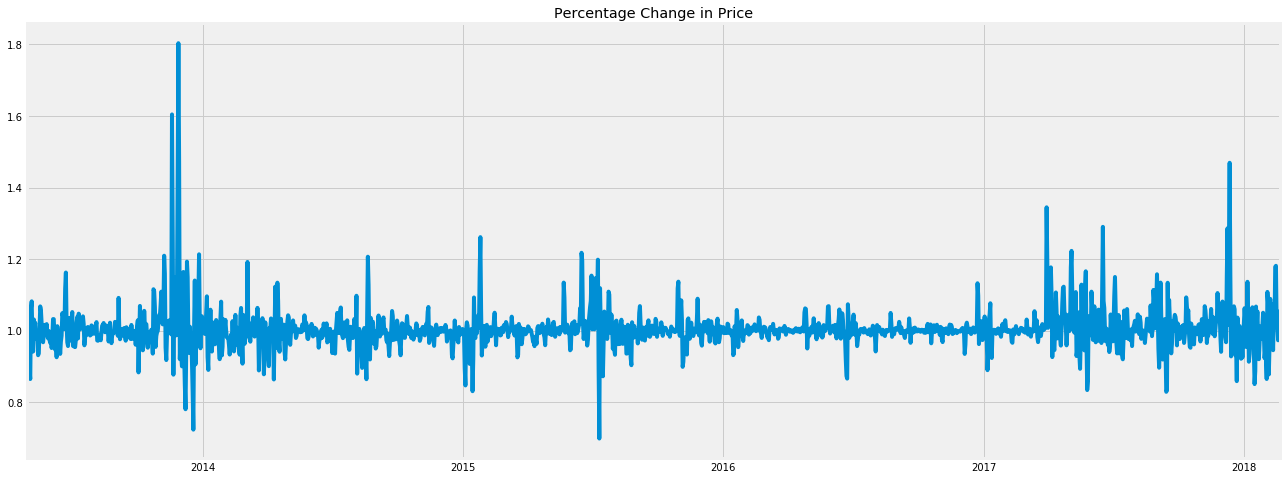

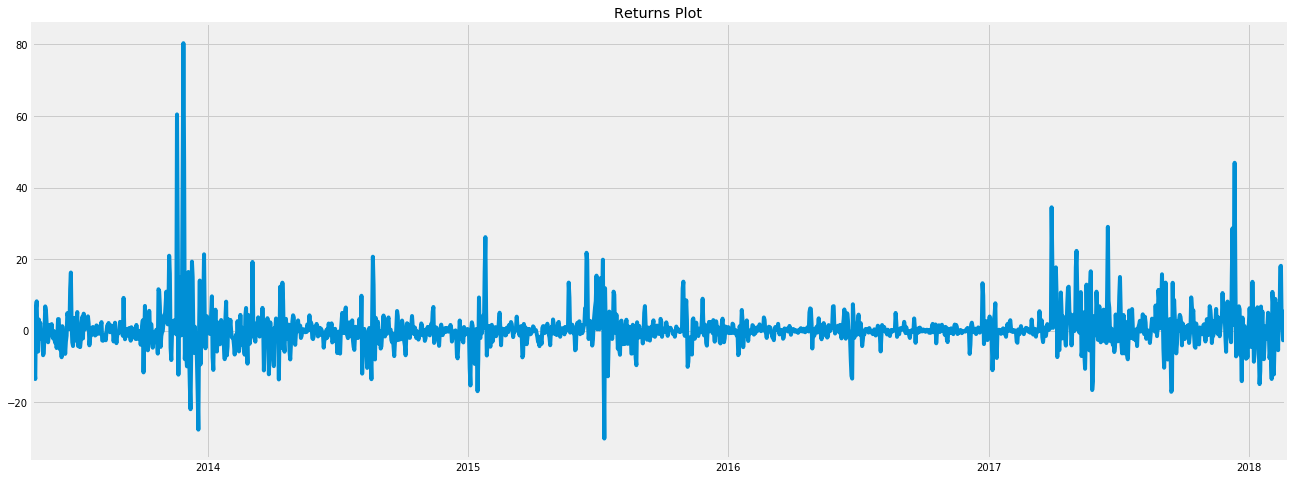

C:\Users\mehul\Time_Series_Analysis\predictions.py:59: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.data.rolmean = self.data.Mean.rolling(30).mean()
C:\Users\mehul\Time_Series_Analysis\predictions.py:60: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.data.rolstd = self.data.Mean.rolling(30).std()


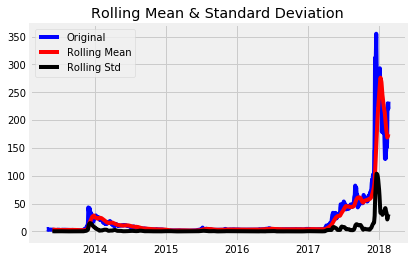

Results of Dickey-Fuller Test
Test Statistic                   -1.282548
p-value                           0.637118
#Lags Used                       25.000000
Number of Observations Used    1734.000000
Critical Value(1%)               -3.434127
Critical Value(5%)               -2.863208
Critical Value(10%)              -2.567658
dtype: float64
------------------------------------------------------------------------------
Results of KPSS Test:
Test Statistic            1.847673
p-value                   0.010000
Lags Used                25.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
------------------------------------------------------------------------------
Results of Phillips-Perron Test:
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -0.425
P-value                         0.906
Lags                               25
-----------------------------

C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1707: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [3]:
df_lt_coin.description()
df_lt_coin.missing()
df_lt_coin.plot_daily()
df_lt_coin.plot_monthly()
df_lt_coin.Percent_change()
df_lt_coin.Returns()
df_lt_coin.stationarity_test()

In [4]:
from Model import *

In [6]:
lt_ret = model(df_lt_coin.data)

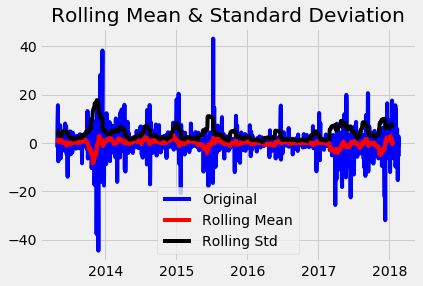

Results of Dickey-Fuller Test
Test Statistic                -1.354645e+01
p-value                        2.456292e-25
#Lags Used                     7.000000e+00
Number of Observations Used    1.751000e+03
Critical Value(1%)            -3.434090e+00
Critical Value(5%)            -2.863192e+00
Critical Value(10%)           -2.567649e+00
dtype: float64
Results of KPSS Test:
------------------------------------------------------------------------------
Test Statistic            0.418692
p-value                   0.069098
Lags Used                25.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
------------------------------------------------------------------------------


In [7]:
lt_ret.stationarity_test()

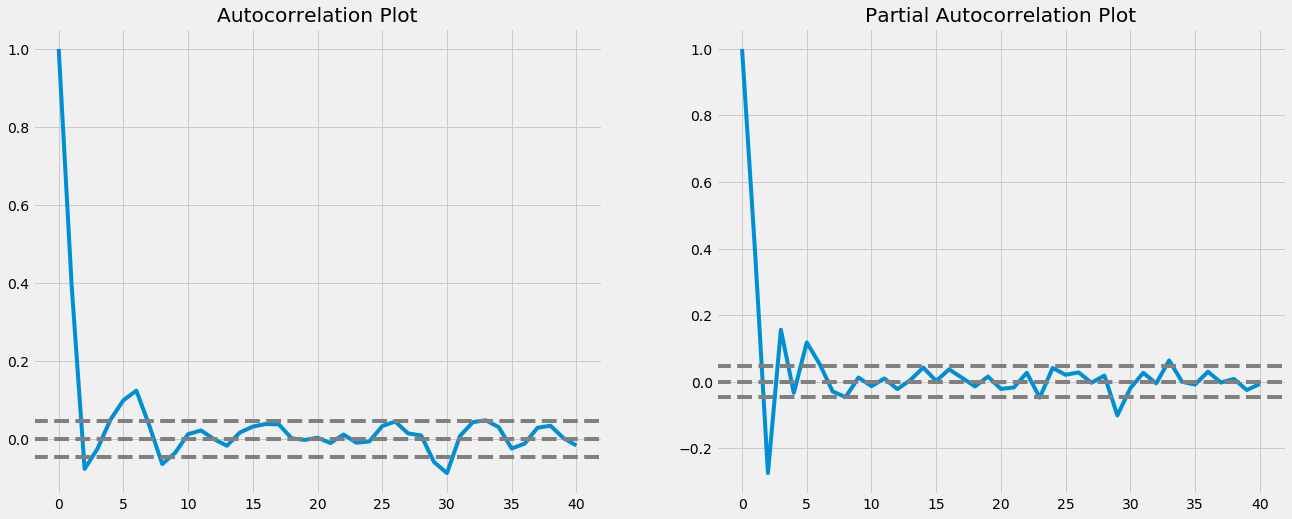

In [8]:
lt_ret.lags()

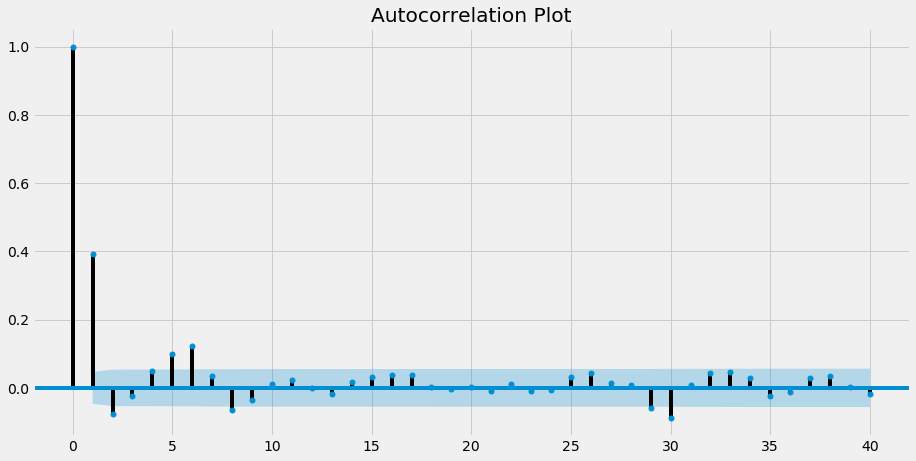

In [9]:
lt_ret.auto_graphics()

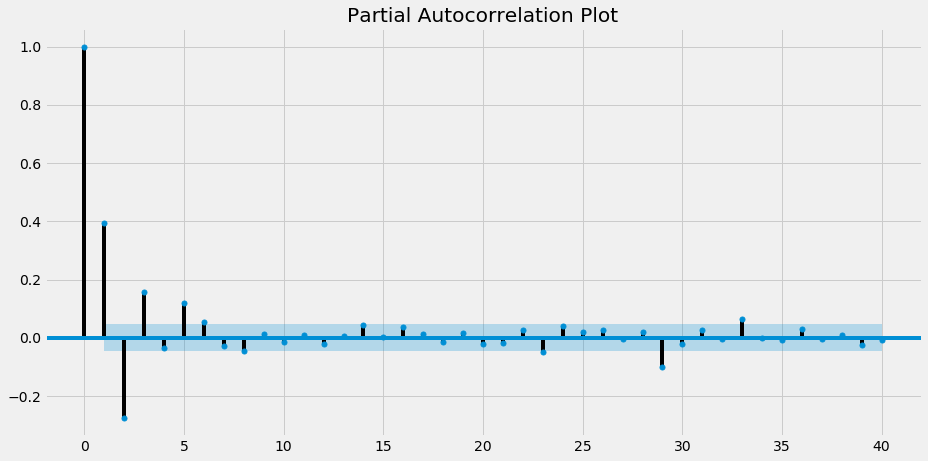

In [10]:
lt_ret.partial_graphics()

In [11]:
lt_ret.ARIMA_model(1,1)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


                           Results: ARMA
Model:              ARMA             BIC:                 10301.5546
Dependent Variable: Returns          Log-Likelihood:      -5135.8   
Date:               2019-10-18 17:49 Scale:               1.0000    
No. Observations:   1759             Method:              css-mle   
Df Model:           3                Sample:              02-19-2018
Df Residuals:       1756                                  04-28-2013
Converged:          1.0000           S.D. of innovations: 4.485     
No. Iterations:     7.0000           HQIC:                10287.754 
AIC:                10279.6646                                      
---------------------------------------------------------------------
                   Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
---------------------------------------------------------------------
const             -0.0900    0.1632  -0.5516  0.5813  -0.4100  0.2299
ar.L1.Returns     -0.0591    0.0389  -1.5207  0.1285  -0.1

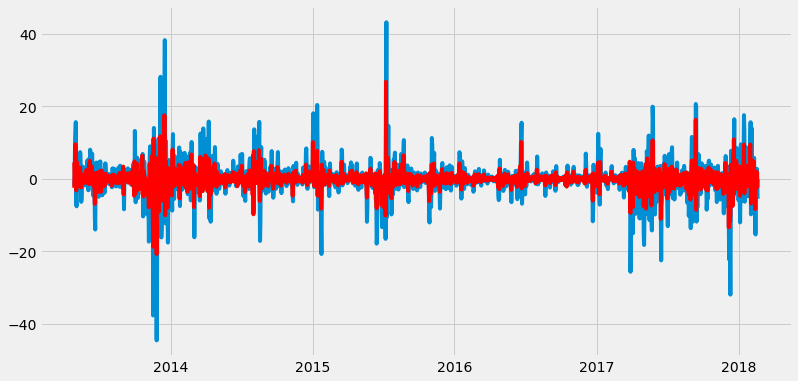

In [12]:
lt_ret.plot_predict()

In [4]:
df_lt_coin.data = df_lt_coin.data['2017-01-01':]

In [5]:
from produce_predict import *
#This step is parameter Selection for our furniture’s sales ARIMA Time Series Model. Our goal here is to use a “grid search” 
#to find the optimal set of parameters that yields the best performance for our model.
lt_sarima = produce_predict(df_lt_coin.data)

In [6]:
lt_sarima.order()

ARIMA(0, 0, 0)x(0, 0, 0, 30) - AIC:5036.173374831082
ARIMA(0, 0, 0)x(0, 0, 1, 30) - AIC:4491.8933684775
ARIMA(0, 0, 0)x(0, 1, 0, 30) - AIC:4292.577358125505
ARIMA(0, 0, 0)x(0, 1, 1, 30) - AIC:3956.234108567217
ARIMA(0, 0, 0)x(1, 0, 0, 30) - AIC:4298.09185636745
ARIMA(0, 0, 0)x(1, 0, 1, 30) - AIC:4171.420844035651
ARIMA(0, 0, 0)x(1, 1, 0, 30) - AIC:3970.3416124962755
ARIMA(0, 0, 0)x(1, 1, 1, 30) - AIC:3958.2335799897055
ARIMA(0, 0, 1)x(0, 0, 0, 30) - AIC:4489.219804389871
ARIMA(0, 0, 1)x(0, 0, 1, 30) - AIC:3992.384332724044
ARIMA(0, 0, 1)x(0, 1, 0, 30) - AIC:3810.153371879787
ARIMA(0, 0, 1)x(0, 1, 1, 30) - AIC:3504.999195180953
ARIMA(0, 0, 1)x(1, 0, 0, 30) - AIC:3822.3175336377462
ARIMA(0, 0, 1)x(1, 0, 1, 30) - AIC:3691.443911642574
ARIMA(0, 0, 1)x(1, 1, 0, 30) - AIC:3528.778792673022
ARIMA(0, 0, 1)x(1, 1, 1, 30) - AIC:3506.999098906441
ARIMA(0, 1, 0)x(0, 0, 0, 30) - AIC:2934.987428410869
ARIMA(0, 1, 0)x(0, 0, 1, 30) - AIC:2735.500351644093
ARIMA(0, 1, 0)x(0, 1, 0, 30) - AIC:3066.561994

C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 30) - AIC:2763.789345819865


C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 0, 30) - AIC:3071.5997670889747
ARIMA(1, 0, 0)x(0, 1, 1, 30) - AIC:2617.8817879811286
ARIMA(1, 0, 0)x(1, 0, 0, 30) - AIC:2738.0587220702655
ARIMA(1, 0, 0)x(1, 0, 1, 30) - AIC:2739.8418447310796
ARIMA(1, 0, 0)x(1, 1, 0, 30) - AIC:2686.6894909927014
ARIMA(1, 0, 0)x(1, 1, 1, 30) - AIC:2601.3278282560877
ARIMA(1, 0, 1)x(0, 0, 0, 30) - AIC:2840.700514016815


C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 30) - AIC:2668.697784014649
ARIMA(1, 0, 1)x(0, 1, 0, 30) - AIC:2946.2552537441343
ARIMA(1, 0, 1)x(0, 1, 1, 30) - AIC:2525.4796173045142
ARIMA(1, 0, 1)x(1, 0, 0, 30) - AIC:2661.30935170181
ARIMA(1, 0, 1)x(1, 0, 1, 30) - AIC:2657.2801138476775
ARIMA(1, 0, 1)x(1, 1, 0, 30) - AIC:2597.2170103760427
ARIMA(1, 0, 1)x(1, 1, 1, 30) - AIC:2517.846765471417
ARIMA(1, 1, 0)x(0, 0, 0, 30) - AIC:2861.6449996555616
ARIMA(1, 1, 0)x(0, 0, 1, 30) - AIC:2671.3098862219094
ARIMA(1, 1, 0)x(0, 1, 0, 30) - AIC:2987.2150038562386
ARIMA(1, 1, 0)x(0, 1, 1, 30) - AIC:2546.4172344865237
ARIMA(1, 1, 0)x(1, 0, 0, 30) - AIC:2668.7373997460463
ARIMA(1, 1, 0)x(1, 0, 1, 30) - AIC:2670.608497281265
ARIMA(1, 1, 0)x(1, 1, 0, 30) - AIC:2618.774473803561
ARIMA(1, 1, 0)x(1, 1, 1, 30) - AIC:2534.049031341124
ARIMA(1, 1, 1)x(0, 0, 0, 30) - AIC:2833.746061913729
ARIMA(1, 1, 1)x(0, 0, 1, 30) - AIC:2650.438874879882
ARIMA(1, 1, 1)x(0, 1, 0, 30) - AIC:2944.5120218979
ARIMA(1, 1, 1)x(0, 1, 1, 30) - AIC:2518.

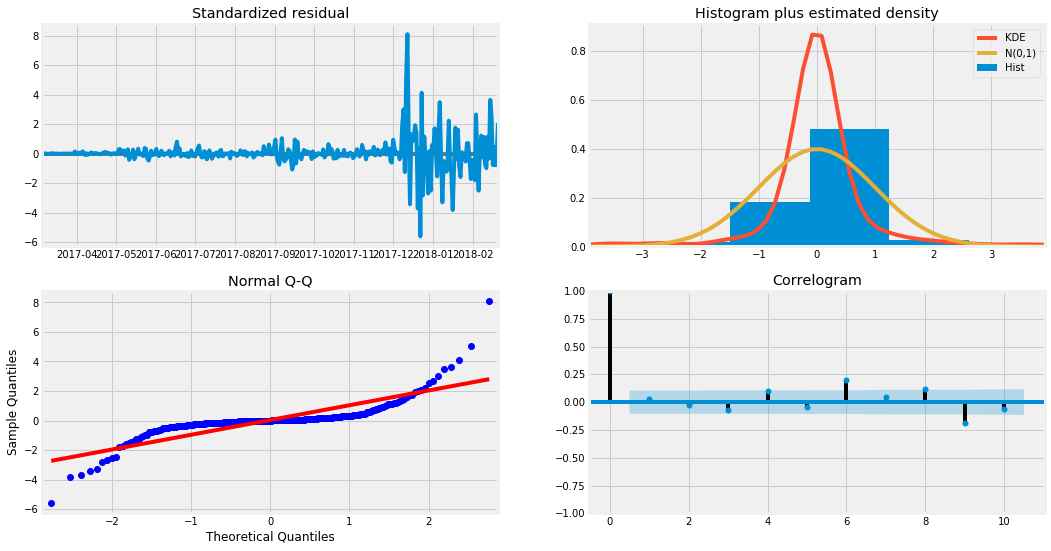

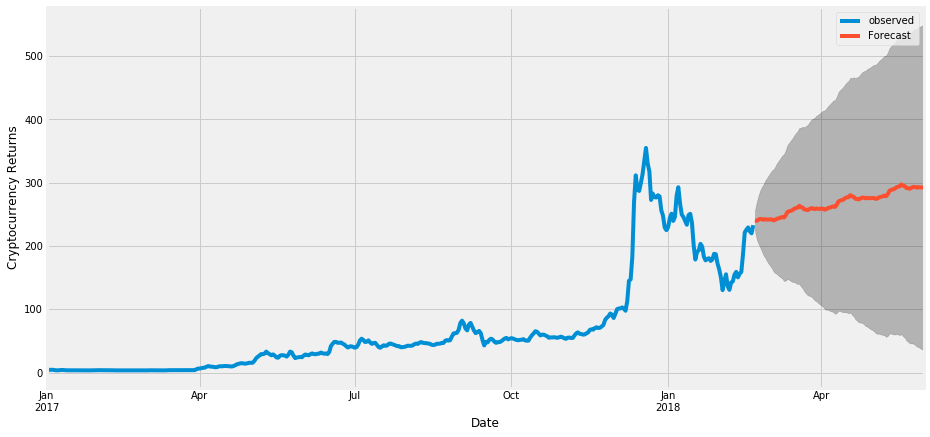

In [8]:
lt_sarima.sarima_model((0,1,1),(0,1,1,30))
lt_sarima.diagnostics()
lt_sarima.produce_forecast()

In [5]:
from VaR import *
var = Var(df_lt_coin.data)

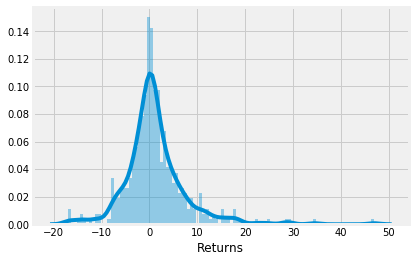

Confidence Interval      Value At Risk
---------------------  ---------------
90%                           -7.27911
95%                           -9.67269
99%                          -14.1627


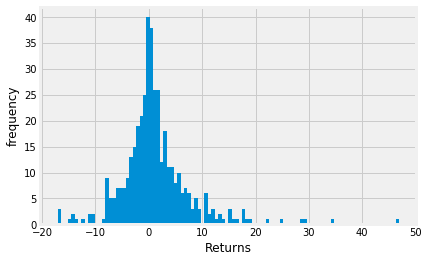

Confidence Interval      Value At Risk
---------------------  ---------------
90%                           -5.47288
95%                           -7.54375
99%                          -14.1551


In [6]:
var.var_cov(100)
var.hist_sim(100)

In [7]:
var.monte_carlo()

Simulated VAR is  -83.00573973895959
